In [2]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
X = df.iloc[:, :]
print(X[:5])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [5]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

kmeans.fit(X)

cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

df['Cluster'] = cluster_label
print(df.head())

[2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0 1 2 2 0 0 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 2 2 2 2 2 1 2 2 0 0 2 2 0 0 1 2 0 0 2 1 2 2 0 1 0 2 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 1 1 0 0 0 0 0 1 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 3 0
 0 0 0 2 2 0 0 0 2 0 0 4 2 4 4 2 2 4 4 4 2 4 4 4 2 4 1 4 4 2 4 2 4 2 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 1 4 4 4 4 4 4 4
 4 4 4 4 4 2 4 2 4 2 4 4 4 4 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 4 2
 4 2 2 4 2 2 2 2 2 2 2 4 4 2 4 4 2 4 4 2 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 2 4
 1 4 2 4 4 4 4 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 2 2 0 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

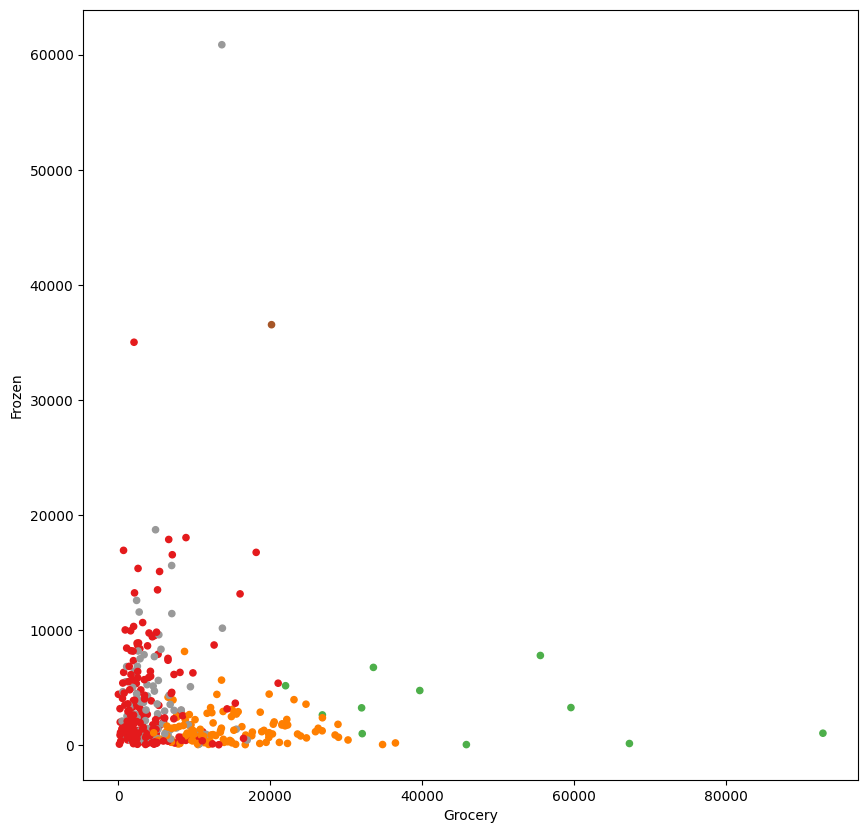

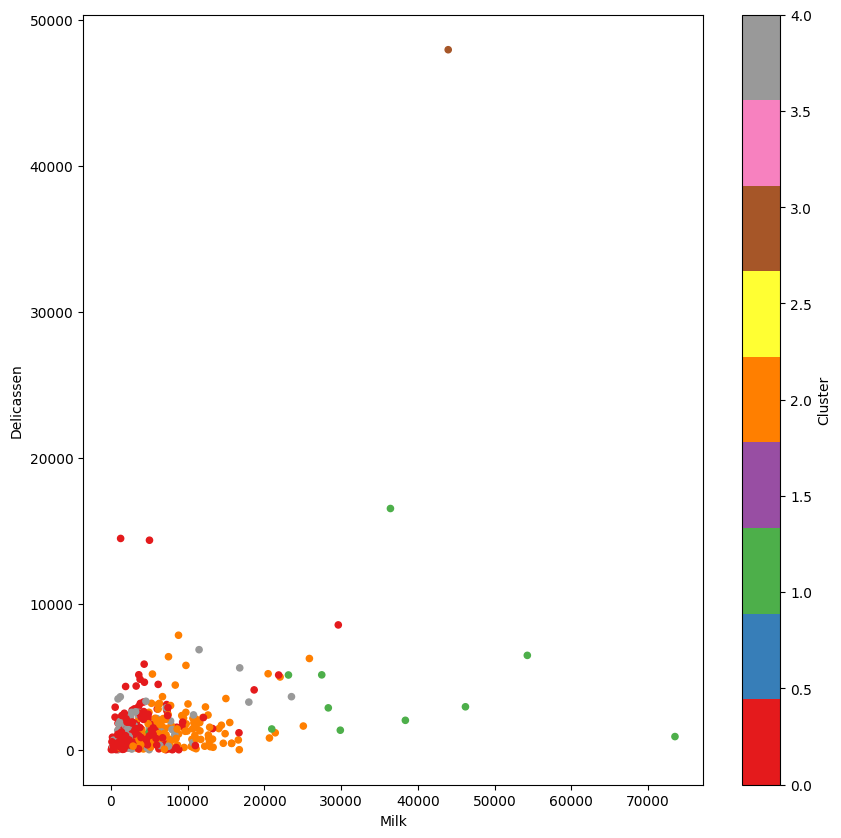

In [6]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10, 10))

plt.show()
plt.close()


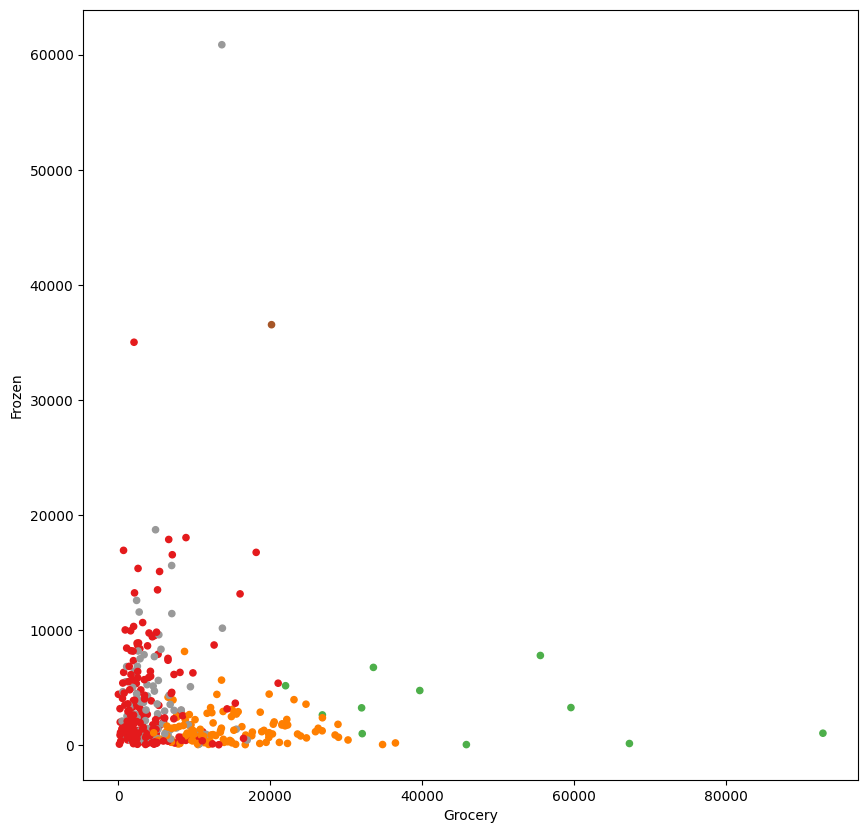

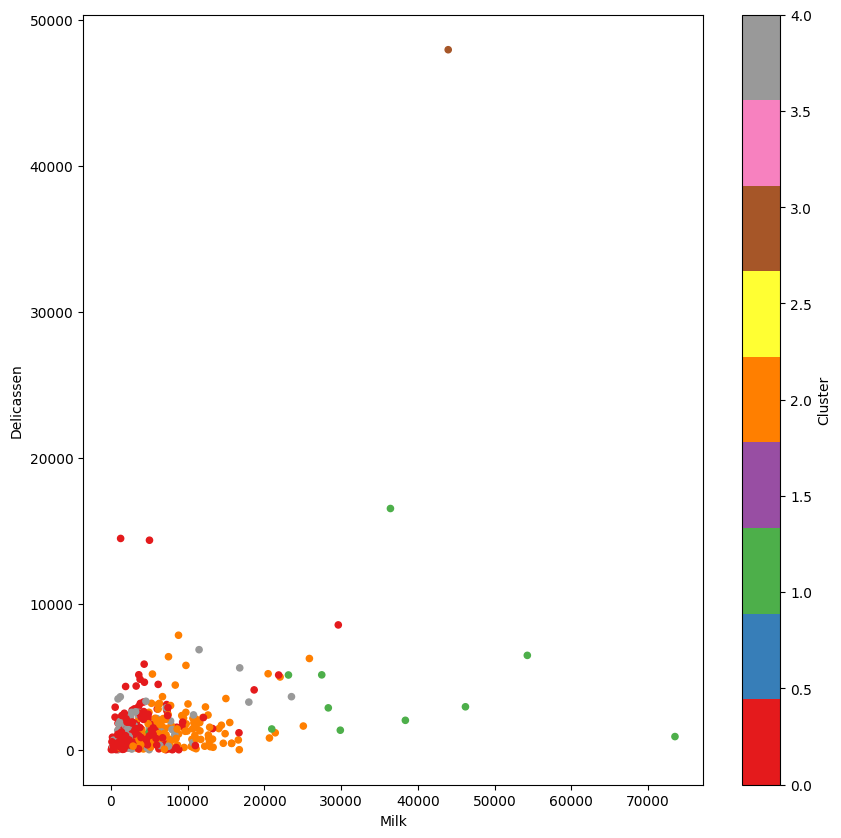

In [9]:
mask = ((df['Cluster'] == 0) | (df['Cluster'] == 4))
ndf = df[~mask]

df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, figsize=(10, 10))

plt.show()
plt.close()